In [2]:
from trueskill_manager import TrueskillManager
from dumper import Dumper
from bipedal_walker_wrapper import BipedalWalkerAgent
from database_utils import DatabaseManager
import sqlite3

from matplotlib import pyplot as plt

NUMBER_OF_LEVELS = 3
save_plots = False
####################################################################
# model tuple = (environment_trained_on, model_id, expected_level)
####################################################################

models = [('easy', 320000, 0), ('easy', 330000, 0), ('easy', 340000, 0), 
         ('medium', 220000, 1), ('medium', 240000, 1), ('medium', 280000, 1),
         ('hard', 1060000, 2), ('hard', 1310000, 2), ('hard', 1550000, 2)]

agent = BipedalWalkerAgent()
dumper = Dumper()
db_manager = DatabaseManager()

def set_env(agent, level_id):
    if level_id == 0:
        agent.set_environment_type(super_easy=True)
    elif level_id == 1:
        agent.set_environment_type()
    elif level_id == 2:
        agent.set_environment_type(hardcore=True)
    else:
        print('Unkonwn level type')
        
def remove_model_from_db(model_id):
    model = models[model_id]
    db_manager.remove_player(model[0], str(model[1]))

def plot_(title, data):
    %matplotlib inline
    plt.rcParams["figure.figsize"] = (15, 5) # (w, h)
    
    
    fig, ax = plt.subplots()
    
    plt.title(title)
    a1 = ax.plot(data[0])
    a2 = ax.plot(data[1])
    a3 = ax.plot(data[2])
    a4 = ax.plot(data[3])

    plt.legend((a1[0], a2[0], a3[0], a4[0]), ('Easy', 'Medium', 'Hard', 'Player'))
    
    if save_plots:
        fig.savefig(title + '.png', bbox_inches='tight')
    
    plt.show()

In [3]:
def validate_trueskill(model, n_games, verbose=False):
    agent.set_model_difficulty(model[1])
    agent.load_model(model[2])
    t_manager = TrueskillManager(model[1], str(model[2]))

    data_to_plot = []
    for i in range(4):
        data_to_plot.append([])
    

    for i in range(n_games):
        level_id = t_manager.choose_opponent()
        
        set_env(agent, level_id)
        outcome, reward = agent.play(render=False)
        if verbose:
            print('Chosen level: {}'.format(level_id))
            print('Outcome: {} \t Reward: {}'.format(outcome, reward))
        t_manager.handle_game_outcome(outcome)
        out = dumper.dump(model[1], str(model[2]), verbose=False)
        for i in range(len(out)):
            data_to_plot[i].append(out[i][3])
            
    final_opponent = t_manager.choose_opponent()
    print('Expected level: {}\nChosen level:{}'.format(model[3], final_opponent))
    outcome = 0
    if final_opponent == model[3]:
        outcome = 1
    return data_to_plot, outcome
    


In [3]:
plot_list = []
for model in models:
    plot_list.append(validate_trueskill(model, 10))
%store plot_list

INFO:tensorflow:Restoring parameters from ./models/easy/model-320000.ckpt
Expected level: 0
Chosen level:1
INFO:tensorflow:Restoring parameters from ./models/easy/model-330000.ckpt
Expected level: 0
Chosen level:0
INFO:tensorflow:Restoring parameters from ./models/easy/model-340000.ckpt
Expected level: 0
Chosen level:0
INFO:tensorflow:Restoring parameters from ./models/medium/model-220000.ckpt
Expected level: 1
Chosen level:1
INFO:tensorflow:Restoring parameters from ./models/medium/model-240000.ckpt
Expected level: 1
Chosen level:2
INFO:tensorflow:Restoring parameters from ./models/medium/model-280000.ckpt
Expected level: 1
Chosen level:1
INFO:tensorflow:Restoring parameters from ./models/hard/model-1060000.ckpt
Expected level: 2
Chosen level:2
INFO:tensorflow:Restoring parameters from ./models/hard/model-1310000.ckpt
Expected level: 2
Chosen level:2
INFO:tensorflow:Restoring parameters from ./models/hard/model-1550000.ckpt
Expected level: 2
Chosen level:2


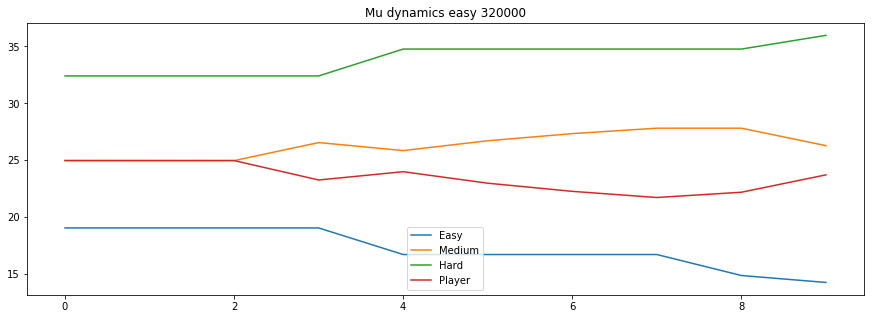

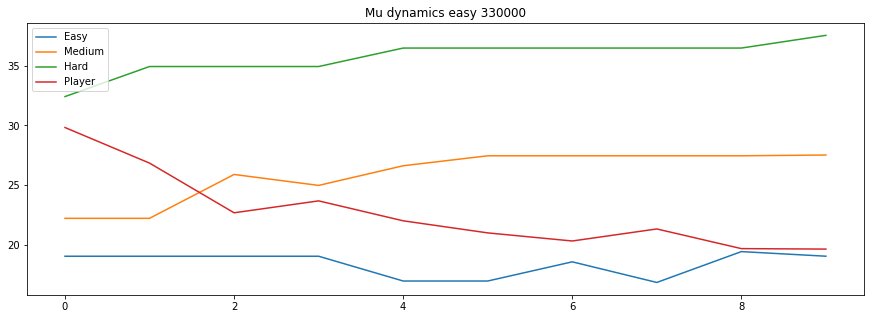

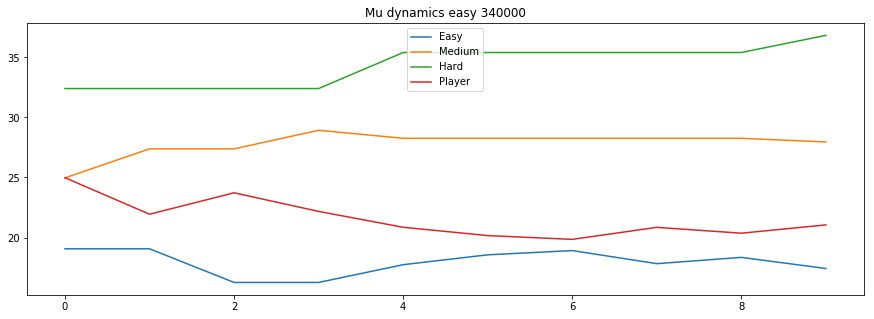

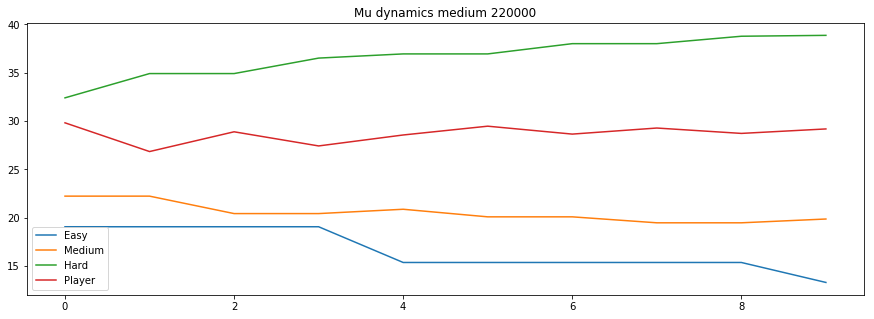

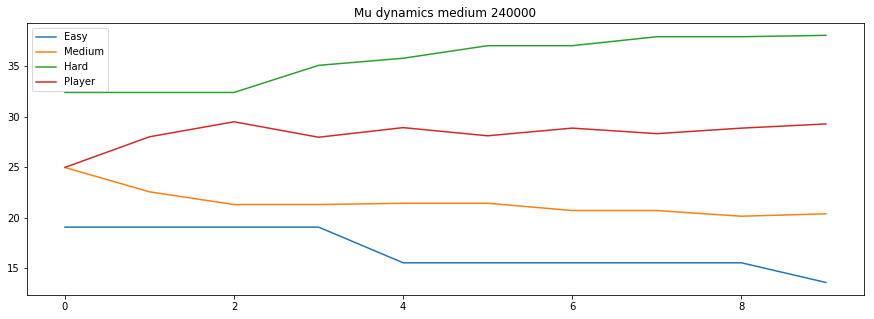

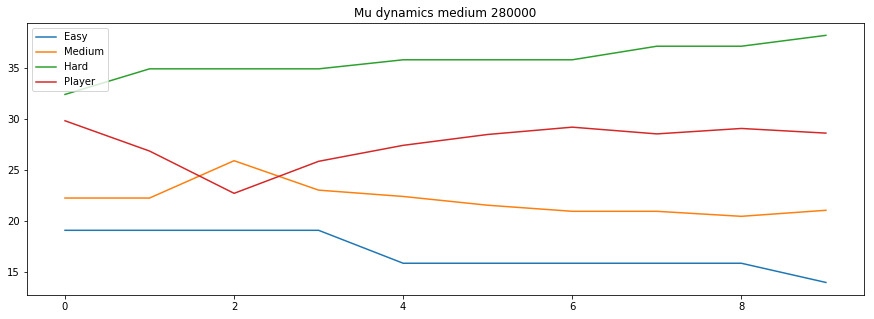

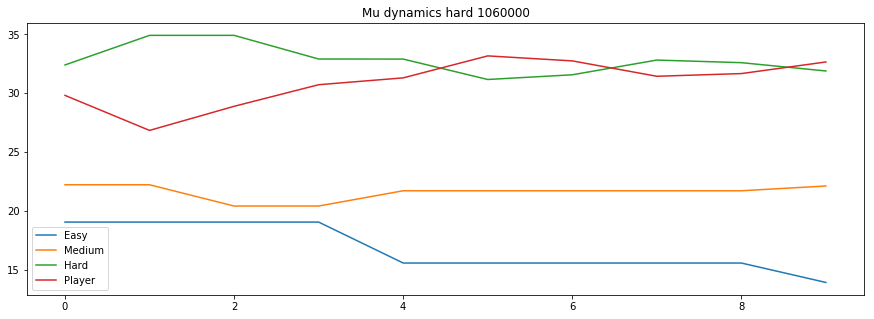

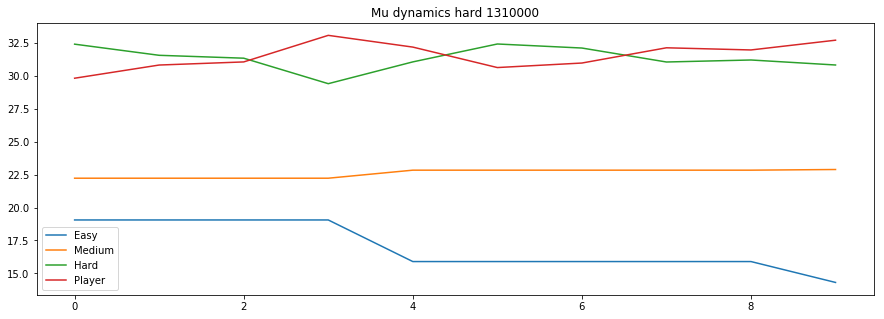

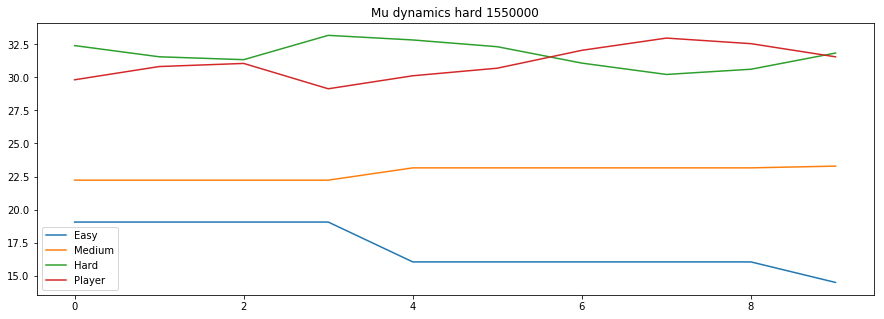

In [4]:
for i in range(len(plot_list)):
    title = 'Mu dynamics' + ' ' + models[i][0] + ' ' + str(models[i][1])
    plot_(title, plot_list[i])


Stored 'plot_list' (list)


In [4]:
conn = sqlite3.connect('./data/validation.db')
cur = conn.cursor()
cur.execute('SELECT * FROM models')

plot_list = []
outcome = 0
models = cur.fetchall()
for model in models:
    validation = validate_trueskill(model, 10)
    plot_list.append(validation[0])
    outcome += validation[1]
    
conn.close() 

INFO:tensorflow:Restoring parameters from ./models/easy/model-250000.ckpt
Expected level: 0
Chosen level:0
INFO:tensorflow:Restoring parameters from ./models/easy/model-320000.ckpt
Expected level: 1
Chosen level:1
INFO:tensorflow:Restoring parameters from ./models/easy/model-330000.ckpt
Expected level: 1
Chosen level:1
INFO:tensorflow:Restoring parameters from ./models/medium/model-220000.ckpt
Expected level: 2
Chosen level:2
INFO:tensorflow:Restoring parameters from ./models/medium/model-250000.ckpt
Expected level: 1
Chosen level:1
INFO:tensorflow:Restoring parameters from ./models/medium/model-260000.ckpt
Expected level: 1
Chosen level:1
INFO:tensorflow:Restoring parameters from ./models/medium/model-270000.ckpt
Expected level: 1
Chosen level:1
INFO:tensorflow:Restoring parameters from ./models/medium/model-280000.ckpt
Expected level: 1
Chosen level:1
INFO:tensorflow:Restoring parameters from ./models/hard/model-1030000.ckpt
Expected level: 2
Chosen level:2
INFO:tensorflow:Restoring 

In [5]:
perc = float(outcome / len(models))
print(perc)
%store plot_list

1.0
Stored 'plot_list' (list)


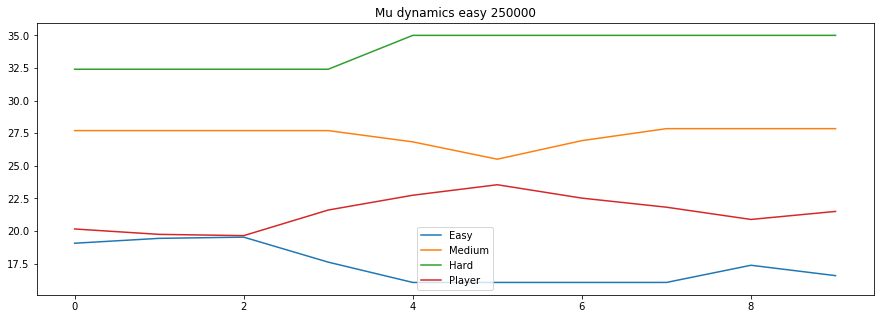

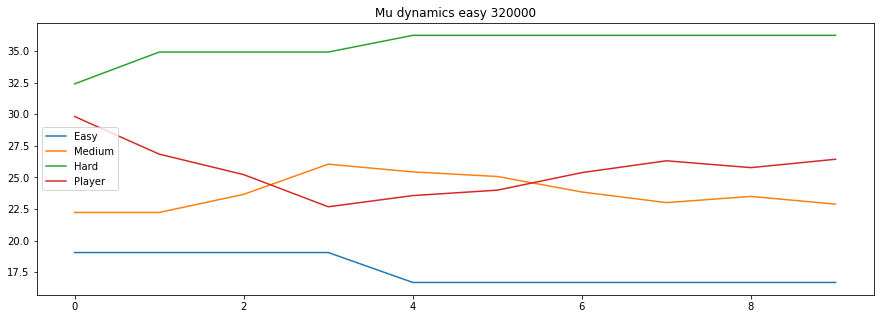

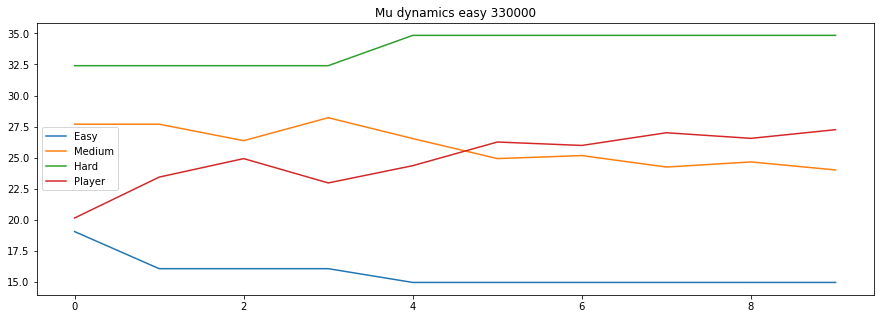

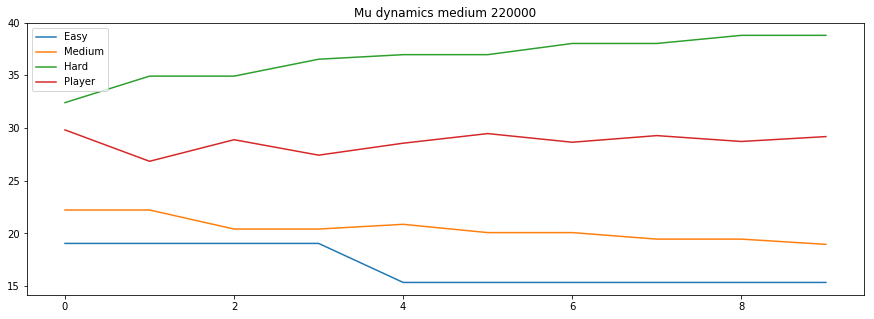

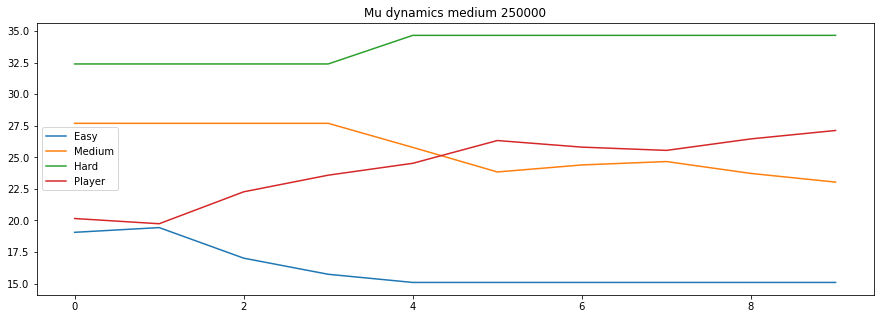

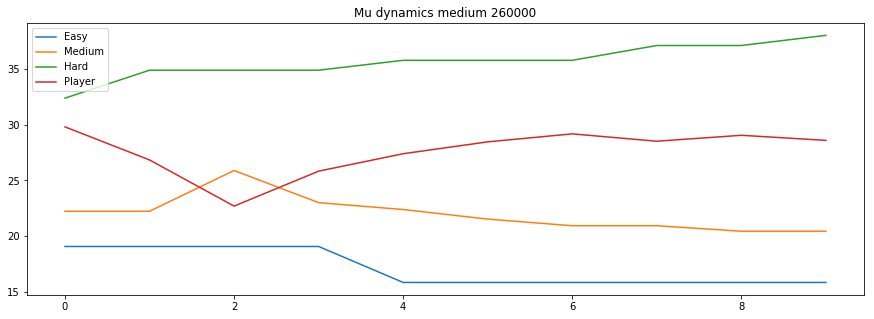

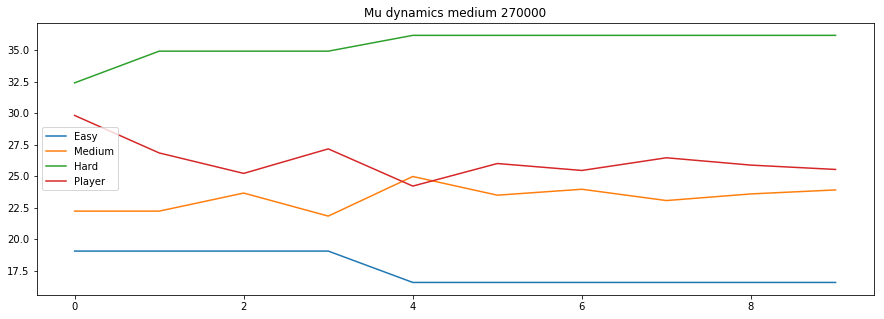

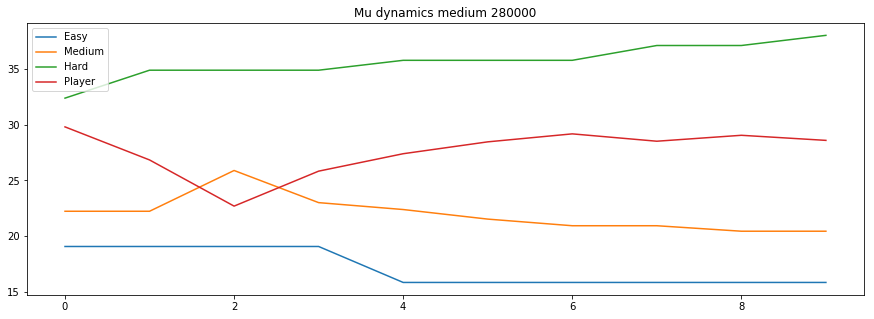

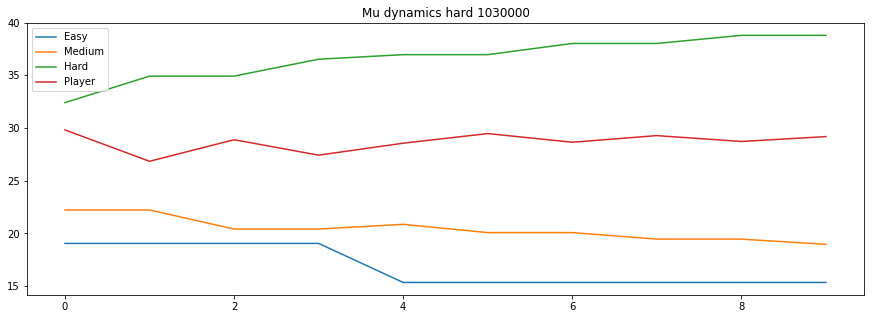

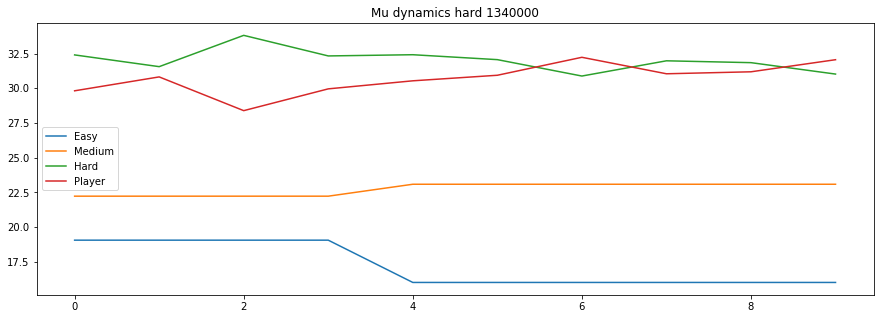

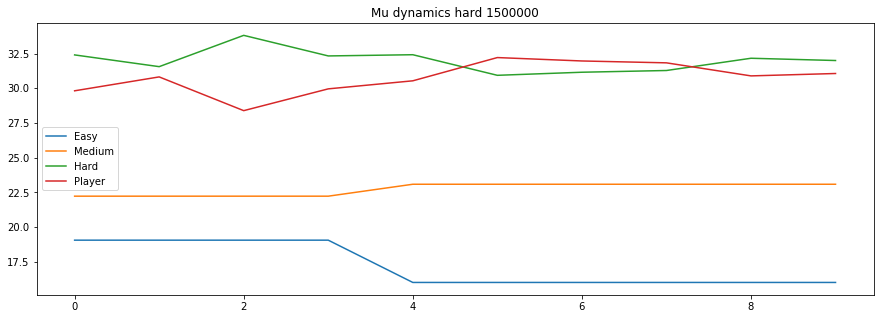

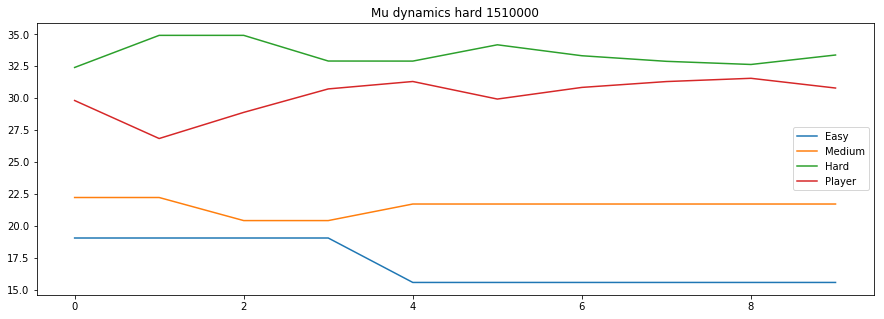

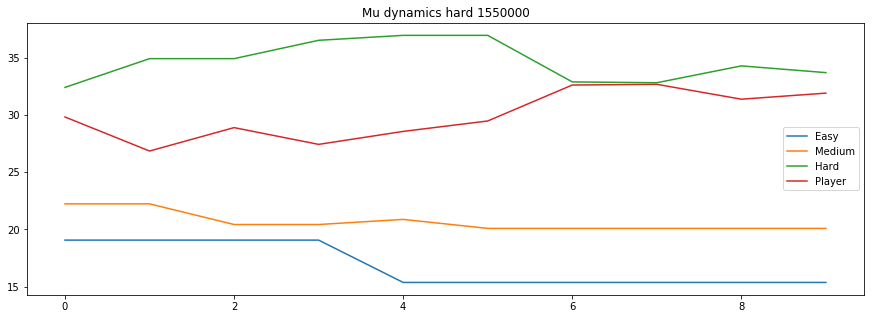

In [6]:
for i in range(len(plot_list)):
    title = 'Mu dynamics' + ' ' + models[i][1] + ' ' + str(models[i][2])
    plot_(title, plot_list[i])

In [7]:
dumper.dump()

(1, 'easy', '250000', 21.499098810198216, 2.6803825551467386, 10, 2)
#########################
easy 250000
	mu:21.499098810198216
	sigma:2.6803825551467386
	games_played:10
	rank_update2
level:0
    mu:16.57296636828717
    sigma:3.0087276619559384
level:1
    mu:27.847733850440267
    sigma:3.4506947835911754
level:2
    mu:35.003801520382076
    sigma:5.462759007396547
#########################
(2, 'easy', '320000', 26.438248969119595, 2.51945300107526, 10, 2)
#########################
easy 320000
	mu:26.438248969119595
	sigma:2.51945300107526
	games_played:10
	rank_update2
level:0
    mu:16.69141825159928
    sigma:5.595068787930057
level:1
    mu:22.88489641592643
    sigma:2.433215998827573
level:2
    mu:36.240528902800854
    sigma:5.100327378431451
#########################
(3, 'easy', '330000', 27.25566575399991, 2.5206801853848155, 10, 2)
#########################
easy 330000
	mu:27.25566575399991
	sigma:2.5206801853848155
	games_played:10
	rank_update2
level:0
    mu:14.9686